In [1]:
import matplotlib.pyplot as plt

In [2]:
dev1_eer = [18.0700, 14.7720, 15.1113, 12.8632, 13.3245, 12.9480, 12.9692, 13.1389, 13.3245, 13.4411, 13.3351, 13.1866, 13.5525, 13.4358, 13.4836, 13.4624, 13.5260, 13.4995, 13.4730, 13.6002, 13.5207]
dev2_eer = [17.4973, 14.5599, 14.5175, 12.3860, 12.4761, 12.9321, 11.0498, 11.4687, 11.2513, 11.5323, 11.4899, 11.4634, 11.3786, 11.4634, 11.4899, 11.4104, 11.5536, 11.6649, 11.6331, 11.6437, 11.7073, 11.6172, 11.5854, 11.5589, 11.5323, 11.6066]

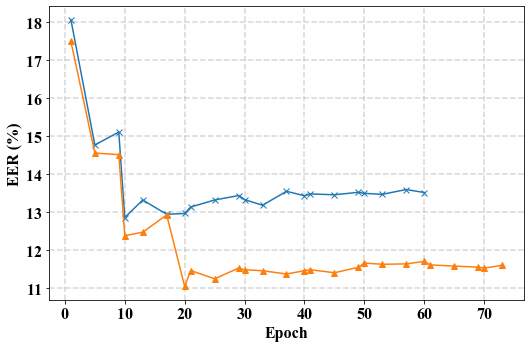

In [27]:
plt.figure(figsize=(8.5, 5.4))
plt.rc('font', family='Times New Roman', weight='semibold')
fontsize=16

x = []
for i in range(1, 80):
    if (i%4==1 or i%10==0):
        x.append(i)

plt.plot(x[:len(dev1_eer)], dev1_eer, marker='x')
plt.plot(x[:len(dev2_eer)], dev2_eer, marker='^')
plt.grid(linestyle='--', alpha=0.5, linewidth=1.5)

plt.ylabel('EER (%)', fontsize=fontsize, fontweight=600)
plt.xlabel('Epoch', fontsize=fontsize, fontweight=600)
_ = plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)



In [1]:
from Process_Data.Datasets.LmdbDataset import CrossEgsDataset
import torchvision.transforms as transforms
from Process_Data.audio_processing import totensor


In [2]:
transform = transforms.Compose([
    totensor()
])

cd = CrossEgsDataset(dir='/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/egs/klfb/dev_fb40', feat_dim=40, transform=transform)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 819200/819200 [00:00<00:00, 860694.62it/s]


In [3]:
x = cd.__getitem__(0)

In [4]:
f,l = x
print(f.shape, l.shape)

torch.Size([144, 600, 40]) torch.Size([144])


In [8]:
f_sq = f.unsqueeze(0)# .shape
print(f_sq.transpose(0,1).shape)

torch.Size([144, 1, 600, 40])


In [11]:
from TrainAndTest.common_func import correct_output
import torch

In [12]:
cs = torch.randn(12,24)
label = torch.arange(12)

In [13]:
prec = correct_output(cs, label, topk=(1,))

In [14]:
prec

[tensor([1.])]

In [17]:
_, pred = cs.topk(1, 1, True, True)
pred = pred.t()

In [18]:
pred

tensor([[ 8, 14,  5, 12, 21, 23,  3, 23, 16,  9, 20, 20]])

In [20]:
correct = pred.eq(label.view(1, -1).expand_as(pred))

In [21]:
correct

tensor([[False, False, False, False, False, False, False, False, False,  True,
         False, False]])

In [23]:
correct[:1].view(-1).float().sum(0, keepdim=True)

tensor([1.])